In [2]:
import sys
import gzip

dirname_data = '../../data/AmphiBase/'

#filename_bg_gz = dirname_data + 'Kwon201710_HYNLE_7730gDNA.Hynobius_mitochondrion.bwa_mem.hit.bg.gz'
#filename_bg_gz = dirname_data + 'Kwon201710_HYNQU_x002gDNA.Hynobius_mitochondrion.bwa_mem.hit.bg.gz'
filename_bg_gz = dirname_data + 'Kwon201710_HYNYA_7701gDNA.Hynobius_mitochondrion.bwa_mem.hit.bg.gz'

filename_seqlen_gz = dirname_data + 'Hynobius_mitochondrion.seqlen.gz'

seqlen_list = dict()
f_seqlen_gz = gzip.open(filename_seqlen_gz,'rt')
for line in f_seqlen_gz:
    tokens = line.strip().split()
    seqlen_list[ tokens[0] ] = int(tokens[1])
f_seqlen_gz.close()

wig_list = dict()
f_gz = gzip.open(filename_bg_gz,'rt')
lines = f_gz.readlines()
#print("\n".join(lines[:3]))

for line in lines:
    tokens = line.strip().split("\t")
    t_id = tokens[0]
    if not t_id in seqlen_list:
        sys.stderr.write('SEQLEN not available: %s\n'%t_id)
        continue
        
    if not t_id in wig_list:
        wig_list[t_id] = [0 for x in range(seqlen_list[t_id])]

    for i in range(int(tokens[1]), int(tokens[2])):
        wig_list[t_id][i] += int(tokens[3])
f_gz.close()

print(wig_list[t_id][:4])
sys.stderr.write('Done\n')


[1, 1, 1, 1]


Done


[638, 639, 646, 651, 655, 655, 653, 650, 650, 649, 648, 645, 646, 645, 644, 642, 640, 634, 634, 635, 635, 637, 634, 625, 623, 621, 618, 627, 627, 623, 620, 618, 613, 607, 601, 597, 596, 596, 598, 599, 599, 599, 594, 590, 586, 584, 584, 579, 579, 576, 570, 567, 544, 536, 537, 537, 537, 537, 533, 530, 528, 526, 523, 510, 503, 501, 495, 491, 488, 487, 480, 474, 469, 456, 455, 450, 442, 440, 437, 433, 429, 420, 412, 410, 403, 398, 388, 386, 384, 379, 372, 370, 363, 360, 354, 345, 338, 332, 328, 322, 317, 308, 301, 299, 296, 294, 291, 283, 276, 275, 269, 263, 260, 258, 254, 248, 239, 236, 229, 229, 226, 221, 218, 213, 209, 208, 200, 199, 196, 192, 192, 187, 183, 182, 176, 169, 165, 157, 151, 149, 147, 139, 135, 130, 129, 125, 122, 116, 112, 110, 106, 98, 97, 87, 79, 72, 70, 69, 67, 65, 65, 63, 62, 59, 57, 53, 49, 48, 47, 45, 42, 41, 39, 33, 31, 30, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 26, 24, 19, 13, 8, 5, 3, 2, 4, 4, 7, 9, 11]


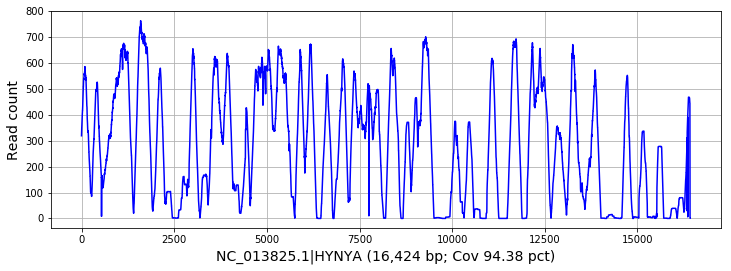

In [3]:
%matplotlib inline

#t_id = 'NC_008079.1|HYNLE'
#t_id = 'NC_010224.1|HYNQU'
t_id = 'NC_013825.1|HYNYA'

import matplotlib.pyplot as plt
print( wig_list[t_id][3000:3200])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(range(seqlen_list[t_id]), wig_list[t_id], 'b-')
ax1.grid()
ax1.set_ylabel('Read count', fontsize=14)
tmp_cov_pct = len([x for x in wig_list[t_id] if x > 0])/seqlen_list[t_id]*100.0
ax1.set_xlabel('%s (%s bp; Cov %.2f pct)'%(t_id, "{:,}".format(seqlen_list[t_id]), tmp_cov_pct), fontsize=14)
plt.show()
